In [ ]:
# In diesem Notebook wird die Ja/Nein Evaluation ausgewertet und die Graafiken dazu erstellt

In [32]:
# Im Vorfeld, sollten drei Json-Dateien im results_directory vorliegen (...model_name.json, ...mistral_base.json, ...chat_gpt.json)

correct_answers_yes_no = ["Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja", "Ja","Ja", "Ja", "Ja", "Ja", "Ja"]

model_name = "plainData_finetuning-6500"
results_directory = "generation_results/"

with_logging = True

In [33]:
import json

trained_results_path = results_directory + "yes_no_" + model_name + ".json"
if with_logging: print("Reading trained model Yes/No results from: " + trained_results_path)

with open(trained_results_path, 'r') as file:
    json_data = json.load(file)

trained_answers = [item['short'] for item in json_data]
if with_logging: print(trained_answers)

trained_true = 0
trained_false = 0
trained_unknow = 0

for correct_answer, trained_answer in zip(correct_answers_yes_no, trained_answers):
    if trained_answer == "Unklar":
        trained_unknow += 1
    else:
        if correct_answer == trained_answer:
            trained_true += 1
        else:
            trained_false += 1
            
total_length = len(correct_answers_yes_no)

trained_true_percentage = trained_true / total_length
trained_false_percentage = trained_false / total_length
trained_unknown_percentage = trained_unknow / total_length

print(trained_true_percentage)
print(trained_false_percentage)
print(trained_unknown_percentage)

Reading trained model Yes/No results from: generation_results/yes_no_plainData_finetuning-6500.json
['Unklar', 'Unklar', 'Unklar', 'Ja', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar', 'Unklar']
0.04
0.0
0.96


In [35]:
plain_data_1000 = [
    0.0,
    0.0,
    1.0,
]

plain_data_2000 = [
    0.08,
    0.0,
    0.92,
]

plain_data_3000 = [
    0.08,
    0.0,
    0.92,
]

plain_data_4000 = [
    0.04,
    0.0,
    0.96,
]

plain_data_5000 = [
    0.04,
    0.0,
    0.96,
]

plain_data_6500 = [
    0.04,
    0.0,
    0.96,
]

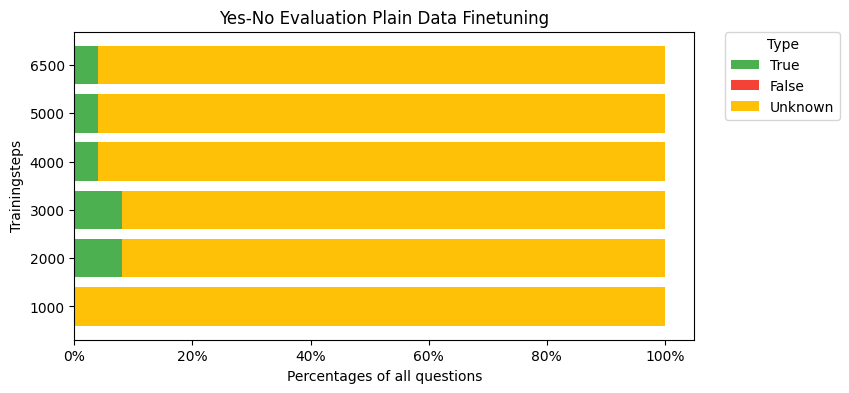

In [38]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

configurations = ["1000", "2000", "3000", "4000", "5000", "6500"]
true_percentages = [plain_data_1000[0], plain_data_2000[0], plain_data_3000[0], plain_data_4000[0], plain_data_5000[0], plain_data_6500[0]]
false_percentages = [plain_data_1000[1], plain_data_2000[1], plain_data_3000[1], plain_data_4000[1], plain_data_5000[1], plain_data_6500[1]]
unknown_percentages = [plain_data_1000[2], plain_data_2000[2], plain_data_3000[2], plain_data_4000[2], plain_data_5000[2], plain_data_6500[2]]

colors = ["#4CAF50", "#F44336", "#FFC107"]  # green for true, red for false, yellow for unknown

plt.figure(figsize=(8, 4))

bottoms = [0] * len(configurations)

plt.barh(configurations, true_percentages, color=colors[0], label="True", left=bottoms)
bottoms = [i + j for i, j in zip(bottoms, true_percentages)]

plt.barh(configurations, false_percentages, color=colors[1], label="False", left=bottoms)
bottoms = [i + j for i, j in zip(bottoms, false_percentages)]

plt.barh(configurations, unknown_percentages, color=colors[2], label="Unknown", left=bottoms)

plt.xlabel("Percentages of all questions")
plt.ylabel("Trainingsteps")
plt.title("Yes-No Evaluation Plain Data Finetuning")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

In [15]:
chat_gpt_scores = [
    0.96,
    0.0,
    0.04,
]

plain_data_6500_scores = [
    0.04,
    0.0,
    0.96,
]

gpt_data_862_scores = [
    0.0,
    0.04,
    0.96,
]

mistral_base_scores = [
    0.12,
    0.28,
    0.6,
]

pretrained_3451_scores = [
    0.08,
    0.08,
    0.84,
]

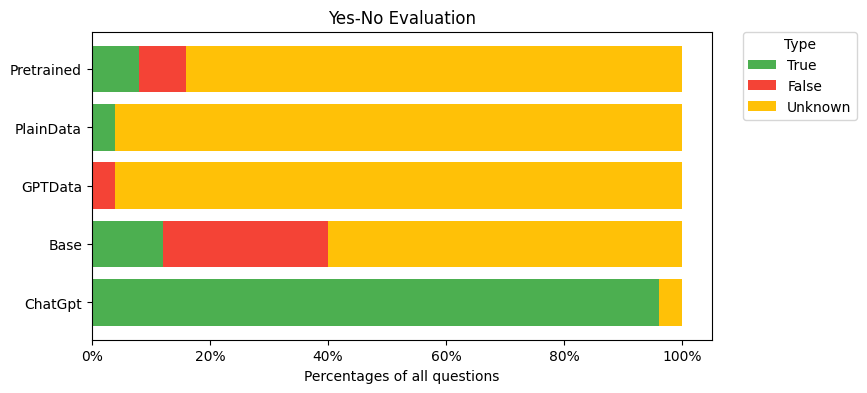

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

configurations = ["ChatGpt", "Base", "GPTData", "PlainData", "Pretrained"]
true_percentages = [chat_gpt_scores[0], mistral_base_scores[0], gpt_data_862_scores[0], plain_data_6500_scores[0], pretrained_3451_scores[0]]
false_percentages = [chat_gpt_scores[1], mistral_base_scores[1], gpt_data_862_scores[1], plain_data_6500_scores[1], pretrained_3451_scores[1]]
unknown_percentages = [chat_gpt_scores[2], mistral_base_scores[2], gpt_data_862_scores[2], plain_data_6500_scores[2], pretrained_3451_scores[2]]

colors = ["#4CAF50", "#F44336", "#FFC107"]  # green for true, red for false, yellow for unknown

plt.figure(figsize=(8, 4))

bottoms = [0] * len(configurations)

plt.barh(configurations, true_percentages, color=colors[0], label="True", left=bottoms)
bottoms = [i + j for i, j in zip(bottoms, true_percentages)]

plt.barh(configurations, false_percentages, color=colors[1], label="False", left=bottoms)
bottoms = [i + j for i, j in zip(bottoms, false_percentages)]

plt.barh(configurations, unknown_percentages, color=colors[2], label="Unknown", left=bottoms)

plt.xlabel("Percentages of all questions")
plt.title("Yes-No Evaluation")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

In [43]:

trained_results_path = results_directory + "yes_no_" + model_name + ".json"
if with_logging: print("Reading trained model Yes/No results from: " + trained_results_path)

with open(trained_results_path, 'r') as file:
    json_data = json.load(file)

trained_answers = [item['short'] for item in json_data]
if with_logging: print(trained_answers)


base_model_results_path = results_directory + "yes_no_mistral_base.json"
if with_logging: print("Reading base model Yes/No results from: " + base_model_results_path)

with open(base_model_results_path, 'r') as file:
    json_data = json.load(file)

base_model_answers = [item['short'] for item in json_data]
if with_logging: print(base_model_answers)


gpt_model_results_path = results_directory + "yes_no_chat_gpt.json"
if with_logging: print("Reading chat gpt Yes/No results from: " + gpt_model_results_path)

with open(gpt_model_results_path, 'r') as file:
    json_data = json.load(file)

gpt_model_answers = [item for item in json_data]
if with_logging: print(gpt_model_answers)


trained_true = 0
base_true = 0
gpt_true = 0

trained_false = 0
base_false = 0
gpt_false = 0

trained_unknow = 0
base_unknow = 0
gpt_unknow = 0

for correct_answer, trained_answer, base_answer, gpt_answer in zip(correct_answers_yes_no, trained_answers, base_model_answers, gpt_model_answers):
    if trained_answer == "Unklar":
        trained_unknow += 1
    else:
        if correct_answer == trained_answer:
            trained_true += 1
        else:
            trained_false += 1

    if base_answer == "Unklar":
        base_unknow += 1
    else:
        if correct_answer == base_answer:
            base_true += 1
        else:
            base_false += 1

    if gpt_answer == "Unklar":
        gpt_unknow += 1
    else:
        if correct_answer == gpt_answer:
            gpt_true += 1
        else:
            gpt_false += 1


total_length = len(correct_answers)

trained_true_percentage = trained_true / total_length
trained_false_percentage = trained_false / total_length
trained_unknown_percentage = trained_unknow / total_length

base_true_percentage = base_true / total_length
base_false_percentage = base_false / total_length
base_unknown_percentage = base_unknow / total_length

gpt_true_percentage = gpt_true / total_length
gpt_false_percentage = gpt_false / total_length
gpt_unknown_percentage = gpt_unknow / total_length

if with_logging:
    print("\nModelname: Correct Answers / False Answers / Not Known")
    print("Trained Model: " + format(trained_true_percentage, ".2%") + " / " + format(trained_false_percentage, ".2%") + " / " + format(trained_unknown_percentage, ".2%"))
    print("Base Model: " + format(base_true_percentage, ".2%") + " / " + format(base_false_percentage, ".2%") + " / " + format(base_unknown_percentage, ".2%"))
    print("Gpt Model: " + format(gpt_true_percentage, ".2%") + " / " + format(gpt_false_percentage, ".2%") + " / " + format(gpt_unknown_percentage, ".2%"))

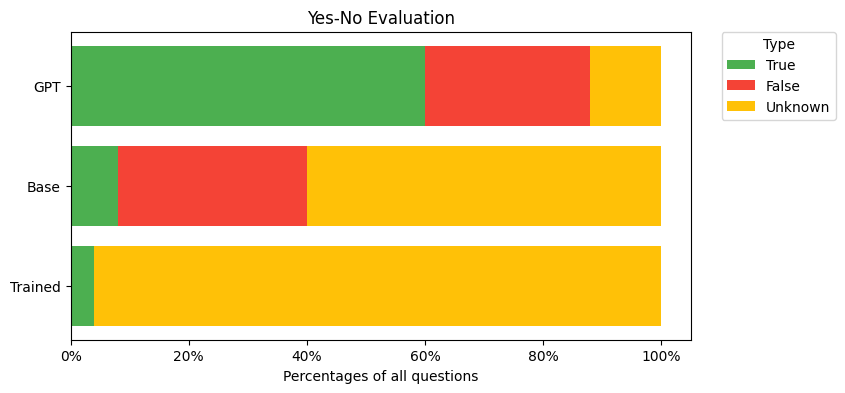

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Define the configurations and their corresponding percentages
configurations = ["Trained", "Base", "GPT"]
true_percentages = [trained_true_percentage, base_true_percentage, gpt_true_percentage]
false_percentages = [trained_false_percentage, base_false_percentage, gpt_false_percentage]
unknown_percentages = [trained_unknown_percentage, base_unknown_percentage, gpt_unknown_percentage]

# Colors for each category
colors = ["#4CAF50", "#F44336", "#FFC107"]  # green for true, red for false, yellow for unknown

# Set up the figure
plt.figure(figsize=(8, 4))

# Initialize the bottom position for the bar stack
bottoms = [0] * len(configurations)

# Plot each segment of the bar
plt.barh(configurations, true_percentages, color=colors[0], label="True", left=bottoms)
bottoms = [i + j for i, j in zip(bottoms, true_percentages)]

plt.barh(configurations, false_percentages, color=colors[1], label="False", left=bottoms)
bottoms = [i + j for i, j in zip(bottoms, false_percentages)]

plt.barh(configurations, unknown_percentages, color=colors[2], label="Unknown", left=bottoms)

# Add labels and title
plt.xlabel("Percentages of all questions")
plt.title("Yes-No Evaluation")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))

# Show plot
plt.show()

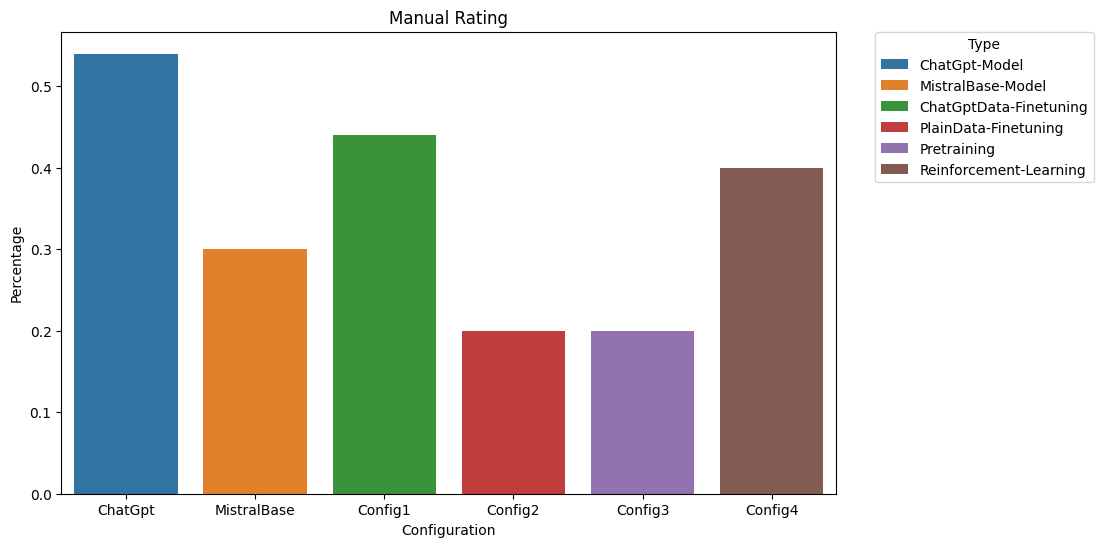

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Configuration": ["ChatGpt", "MistralBase", "Config1", "Config2", "Config3", "Config4"],
    "Type": ["ChatGpt-Model", "MistralBase-Model", "ChatGptData-Finetuning", "PlainData-Finetuning", "Pretraining", "Reinforcement-Learning"],
    "Percentage": [
        0.54, #ChatGpt
        0.30, #MistralBase
        0.44, #ChatGptData-Finetuning
        0.20, #PlainData-Finetuning  
        0.2, #Pretraining 
        0.4, #Reinforcement-Learning 
    ],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Configuration", y="Percentage", hue="Type")

# Add labels and title
plt.title("Manual Rating")
plt.xlabel("Configuration")
plt.ylabel("Percentage")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show plot
plt.show()


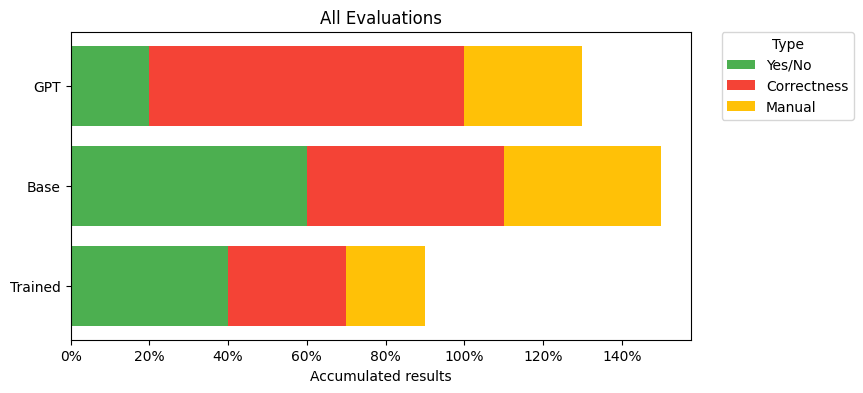

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Define the configurations and their corresponding percentages
configurations = ["Trained", "Base", "GPT"]
true_percentages = [0.4, 0.6, 0.2]
false_percentages = [0.3, 0.5, 0.8]
unknown_percentages = [0.2, 0.4, 0.3]

# Colors for each category
colors = ["#4CAF50", "#F44336", "#FFC107"]  # green for true, red for false, yellow for unknown

# Set up the figure
plt.figure(figsize=(8, 4))

# Initialize the bottom position for the bar stack
bottoms = [0] * len(configurations)

# Plot each segment of the bar
plt.barh(configurations, true_percentages, color=colors[0], label="Yes/No", left=bottoms)
bottoms = [i + j for i, j in zip(bottoms, true_percentages)]

plt.barh(configurations, false_percentages, color=colors[1], label="Correctness", left=bottoms)
bottoms = [i + j for i, j in zip(bottoms, false_percentages)]

plt.barh(configurations, unknown_percentages, color=colors[2], label="Manual", left=bottoms)

# Add labels and title
plt.xlabel("Accumulated results")
plt.title("All Evaluations")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))

# Show plot
plt.show()